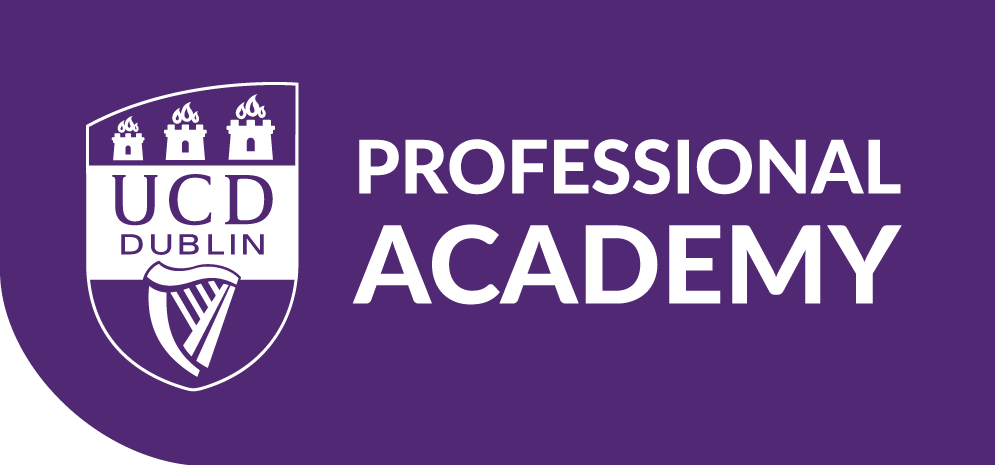
<h1 style="margin-top: -5px; margin-left: 40px; text-align: center; font-size: 3em;"><strong>Module 3 - Python</strong></h1>

# Unit 9 - OOP

## Our agenda:

1. (Re)Introduction of Object Oriented Programming concepts
1. Methods, constructors and the self keyword
1. Special methods
1. Operator overloading and emulating built-in types
1. Polymorphism, inheritance and composition
1. "Private" variables and properties
1. Lab time

# Object-Oriented Programming

## What's the deal with Object-Oriented Programming?

Until now, we learned about Python's basic data types and the built-in data structures, as well as about functions working on them as independent entities.

In addition, we mentioned that everything in Python is an object, and that methods are functions attached to objects (e.g. a string's `.lower()` method)

In today's lecture, we'll talk about creating our own objects, that is our own custom data types, in order to combine data and behaviour.

In [21]:
# Python uses "Class-based" objects, which means that to create a new kind of object, we need to define a class
# A class would represent a type of entity in the real world (or at least in our domain).

# Let's say that our domain is a hair salon, and our example will be of a class to represent a customer.
# To create a class, we use the Class keyword and the convention is to start a class name with an upper-case letter
# If we don't want to put anything special in our class, we can just use the no-op statement `pass`:

class Customer:
    pass


# we then call the class as if it were a function to create a new object of that class,
# this is officially called instantiation, with each object being an "instance" of the class
alice = Customer()
bob = Customer()

# we could then assign each object attributes that are unique to that instance:
alice.age = 34
bob.age = 29

# each object's attributes are independent
alice.age, bob.age

(34, 29)

In [22]:
# we can attach as many attributes as we want to each object
alice.hair_colour = "blonde"
bob.hair_colour = "brown"

alice.hair_colour, bob.hair_colour

('blonde', 'brown')

In [23]:
# But in the class above, we haven't actually defined anything specific to a customer,
# and every instance can be entirely different.
# Instead, we usually want each class to have a structure specific to the entity it represents.
# Let's start by adding the `age` and `hair_color` attributes to the class itself
# These then become the default values for the attributes of each instance
# (note that we don't need the `pass` anymore)
class Customer:
    age = 21
    hair_colour = "brown"


alice = Customer()
print(f"{alice.age=}, {alice.hair_colour=}")

alice.age=21, alice.hair_colour='brown'


In [26]:
# Let's now set those values to the 'real' values for Alice:
alice.age = 34
alice.hair_colour = "blonde"

# The attributes assigned to an object override those on a class
print(f"{alice.age=}, {alice.hair_colour=}")

alice.age=34, alice.hair_colour='blonde'


In [25]:
# But they don't change the class attributes, which will still be the defaults for future instances:
bob = Customer()
print(f"{bob.age=}, {bob.hair_colour=}")

# Bob already has the default hair colour, such that we only need to override their age:
bob.age = 29
print(f"{bob.age=}, {bob.hair_colour=}")

bob.age=21, bob.hair_colour='brown'
bob.age=29, bob.hair_colour='brown'


In [27]:
# So far we only used data, but we said that objects are about combining data and behaviour, so let's do that now by adding a method to our class:
class Customer:
    age = 21
    hair_colour = "brown"

    def describe(self):  # Note the special parameter `self` that allows the method to refer to the object itself
        return f"A {self.age} year-old, with {self.hair_colour} hair"


alice = Customer()
alice.describe()

'A 21 year-old, with brown hair'

In [28]:
alice.age = 34
alice.hair_colour = 'blonde'
alice.describe()

'A 34 year-old, with blonde hair'

In [29]:
# We could use an object like this to implement interactions between users and our program
print('Hi Alice, welcome to our hair salon')
new_colour = input('Would you like to dye your hair? If so, what colour would you like? ')
alice.hair_colour = new_colour
alice.describe()

# But the above code requires us to expose the internals of the object to the user.
# We can do better by using methods to interact with the object

Hi Alice, welcome to our hair salon


'A 34 year-old, with dark red hair'

In [30]:
# Objects are about combining an entity's data with `behaviour` that the entity can perform
# They are particularly useful for entities that have a "state" that changes when events happen
# So let's add a method that changes the customer object's state when they dye their hair

class Customer:
    age = 21
    hair_colour = "brown"

    def describe(self):  # Note the special parameter `self` that allows the method to refer to the object itself
        return f"A {self.age} year-old, with {self.hair_colour} hair"
    
    def dye_hair(self, new_colour):
        print(f"Dyeing to {new_colour}")
        self.hair_colour = new_colour  # remember to use `self` whenever referring to the object


alice = Customer()
print(alice.describe())

print('Hi Alice, welcome to our hair salon')
new_colour = input('Would you like to dye your hair? If so, what colour would you like? ')

alice.dye_hair(new_colour)
print(alice.describe())

A 21 year-old, with brown hair
Hi Alice, welcome to our hair salon
Dyeing to purple
A 21 year-old, with purple hair


# Adding a constructor
A constructor (aka initialiser) is a special method that is run whenever we create a new object.
In Python, all special methods have specific names that are always preceded and succeeded by a double underscore, and we usually refer to them as "dunder" (double underscore) methods.
These are methods on your classes that the Python interpreter might call on its own (it will never call any method named without dunder).

The constructor method in Python must be named `__init__`.

In [4]:
# Let's now use a constructor to provide our Customer's age and hair colour.
class Customer:
    # Note that the __init__ method is by convention always placed at the top
    # By using parameters with default values, we no longer need to use class attributes
    def __init__(self, age=21, hair_colour="brown"):
        self.age = age
        self.hair_colour = hair_colour

    def describe(self):  # Note the special parameter `self` that allows the method to refer to the object itself
        return f"A {self.age} year-old, with {self.hair_colour} hair"
    
    def dye_hair(self, new_colour):
        print(f"Dyeing to {new_colour}")
        self.hair_colour = new_colour  # remember to use `self` whenever referring to the object


alice = Customer(age=34, hair_colour="blue")
print(alice.describe())

alice.dye_hair("blonde")
print(alice.describe())

A 21 year-old, with brown hair
Dyeing to blonde
A 21 year-old, with blonde hair


In [35]:
bob = Customer(hair_colour="gray")
bob.describe()

'A 21 year-old, with gray hair'

In [33]:
# Alternatively, we could just use the constructor to create alice with blonde hair directly
alice = Customer(34, "blonde")
print(alice.describe())

A 34 year-old, with blonde hair


In [36]:
print("Hi, welcome to our hair salon")
age = input("How old are you?")
hair_colour = input("What's your current hair colour?")

new_customer = Customer(age, hair_colour)
new_customer.describe()

Hi, welcome to our hair salon


'A 51 year-old, with black hair'

In [37]:
# We can still assign values directly to object attributes
alice.age = 35
print(alice.describe())
# But we typically prefer to avoid it and we'll later see a way around this

A 35 year-old, with blonde hair


In [39]:
# Let's see what happens when try to just look at the alice object:
alice, bob

(<__main__.Customer at 0x1d61b97a190>, <__main__.Customer at 0x1d61b482cd0>)

In [40]:
# and the same would appear if we use `print`
print(alice)

In [41]:
# We can do better then that ugly default, by creating a __repr__ method
# The convention is to use the format used to construct the same object:
class Customer:
    def __init__(self, age=21, hair_colour="brown"):
        self.age = age
        self.hair_colour = hair_colour

    def __repr__(self):
        return f"Customer(age={self.age}, hair_colour='{self.hair_colour}')"
        
    def describe(self):
        return f"A {self.age} year-old, with {self.hair_colour} hair"
    
    def dye_hair(self, new_colour):
        print(f"Dyeing to {new_colour}")
        self.hair_colour = new_colour


alice = Customer(34)
alice

Customer(age=34, hair_colour='brown')

In [43]:
Customer(age=38, hair_colour='brown')

Customer(age=38, hair_colour='brown')

In [44]:
# By default this special __repr__ method will also be used to print an object:
print(alice)

Customer(age=34, hair_colour='brown')


In [54]:
# But usually we will want a nicer print-out than the representation, this is the purpose of the __str__ method
# We already have our describe method, so we could just rename that

class Customer:
    def __init__(self, age=21, hair_colour="brown"):
        self.age = age
        self.hair_colour = hair_colour

    def __repr__(self):
        return f"Customer(age={self.age}, hair_colour={self.hair_colour})"
        
    def __str__(self):
        return f"A {self.age} year-old, with {self.hair_colour} hair"
    
    def dye_hair(self, new_colour):
        print(f"Dyeing to {new_colour}")
        self.hair_colour = new_colour


alice = Customer(34)
print(alice)  # Now we don't need to call a method to get a nice description anymore

A 34 year-old, with brown hair


In [52]:
# By the way, this also is used when doing f-strings

print(f"Alice is {alice}")

Alice is A 34 year-old, with brown hair


In [56]:
# Let's look at a few more special methods
# For example, how about equality

alice = Customer()
bob = Customer()
print(alice)
print(bob)

# do you expect them to be equal?
alice == bob

A 21 year-old, with brown hair
A 21 year-old, with brown hair


False

In [57]:
# No, they're not, by default any two objects are different, even if they have the same values, which probably works well for people
alice == alice

True

In [58]:
# But note that this holds true even if we give the same object two names: (A rose by any other name would smell as sweet)
alice2 = alice
alice == alice2

True

In [59]:
# Let's create a different type of object - a rectangle

class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        
rect1 = Rectangle(10, 15)
rect2 = Rectangle(10, 15)

print(rect1 == rect2)

False


In [60]:
#hmm, we did expect these to be equal. Let's add an __eq__ method
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def __eq__(self, other):  # it takes the another object as a second parameter
        return self.width == other.width and self.height == other.height

rect1 = Rectangle(10, 15)
rect2 = Rectangle(10, 15)

print(rect1 == rect2)

# If we change the width (or height) attribute to something else, they will no longer be equal
rect2.width = 20
print(rect1 == rect2)

True
False


In [63]:
# How would we go about this, if we wanted to treat two rotated rectangles the same?

# I.e. How do we make this True:
Rectangle(10, 15) == Rectangle(15, 10)


False

In [67]:
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def __eq__(self, other):  # it takes the another object as a second parameter
        return {self.width, self.height} == {other.width, other.height}

Rectangle(10, 15) == Rectangle(15, 10)

False

# Operator overloading

In [68]:
# Quiz - could we use something like this to stretch our rect?
rect1 * 3

TypeError: unsupported operand type(s) for *: 'Rectangle' and 'int'

Similar to what we did with equality, Python encourages us to overload other operators as well, whenever it makes sense for our class.

These include relational operators (returning a boolean):

| operator |        method       |
|:--------:|:-------------------:|
| !=       | `__ne__(self, other)` |
| <        | `__lt__(self, other)` |
| >        | `__gt__(self, other)` |
| <=       | `__le__(self, other)` |
| >=       | `__ge__(self, other)` |

And arithmetic operators (typically returning a new object of the same class):

| operator |        method        |
|:--------:|:--------------------:|
| +        | `__add__(self, other)` |
| -        | `__sub__(self, other)` |
| *        | `__mul__(self, other)` |
| ...      | ...                  |

In [69]:
# For example let's have our rectangle stretch in both direction when multiplied by a number:
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def __repr__(self):
        return f"Rectangle(width={self.width}, height={self.height})"
    
    def __mul__(self, factor):
        return Rectangle(self.width * factor, self.height * factor)

rect1 = Rectangle(10, 15)
rect1

Rectangle(width=10, height=15)

In [70]:
print(rect1 * 3)
print(rect1)

Rectangle(width=30, height=45)
Rectangle(width=10, height=15)


# Emulating existing data types:

Python allows us to emulate most built-in data types. For example:

- Numbers: arithmetics, int(myobj) , float(myobj) , . . .
- Functions: myobj(...)
- Collections: len(myobj) , myobj[...] , x in myobj , ...  Iterators: for i in myobj

See [documentation](http://docs.python.org/3/reference/datamodel.html)


# Polymorphism
Polymorphism (defined as "The condition of occurring in different forms") is a core concept of object-oriented programming, whereby we can different types of objects in the same manner without caring what class they are, as long as they have the same method signatures (name, types of input parameters and type of output).

In [71]:
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def __repr__(self):
        return f"Rectangle(width={self.width}, height={self.height})"
    
    def __mul__(self, factor):
        return Rectangle(self.width * factor, self.height * factor)
    
    def get_perimeter(self):
        return 2 * (self.width + self.height)

    
rect1 = Rectangle(10, 20)
rect1.get_perimeter()

60

In [72]:
from math import pi

class Circle:
    def __init__(self, radius):
        self.radius = radius

    def __repr__(self):
        return f"Circle(radius={self.radius})"

    def __mul__(self, factor):
        return Circle(self.radius * factor)
    
    def get_perimeter(self):
        return 2 * pi * self.radius

circle1 = Circle(10)
circle1.get_perimeter()

62.83185307179586

In [73]:
shapes = [Rectangle(10, 20), Circle(10), Rectangle(20, 15), Circle(5)]

for shape in shapes:
    print(shape.get_perimeter())

60
62.83185307179586
70
31.41592653589793


# Inheritance
Inheritance is another central property of object-oriented programming, allowing us to define "child" classes based on "parent" classes. In this manner, we can have the child class "inherit" methods from their parent, enabling effective reuse of code, and simplifying polymorphism.

In [76]:
# Let's add a __str__ method to both Rectangle and Circle, to describe the shape and its perimeter:
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def __repr__(self):
        return f"Rectangle(width={self.width}, height={self.height})"
    
    def __str__(self):
        return f"A Rectangle with a perimeter of {self.get_perimeter():0.1f}"
    
    def __mul__(self, factor):
        return Rectangle(self.width * factor, self.height * factor)
    
    def get_perimeter(self):
        return 2 * (self.width + self.height)


class Circle:
    def __init__(self, radius):
        self.radius = radius

    def __repr__(self):
        return f"Circle(radius={self.radius})"

    def __str__(self):
        return f"A Circle with a perimeter of {self.get_perimeter():0.1f}"

    def __mul__(self, factor):
        return Circle(self.radius * factor)
    
    def get_perimeter(self):
        return 2 * pi * self.radius


shapes = [Rectangle(10, 20), Circle(10), Rectangle(20, 15), Circle(5)]

for shape in shapes:
    print(shape)

A Rectangle with a perimeter of 60.0
A Circle with a perimeter of 62.8
A Rectangle with a perimeter of 70.0
A Circle with a perimeter of 31.4


This works, but seeing how these methods are almost identical, wouldn't it be nice if we could define the method just once?

In [79]:
# Well, both Rectangle and Circle are shapes, so let's define a Shape class
class Shape:
    def __str__(self):
        class_name = self.__class__.__name__  # It's not the most elegant, but this gives us the class name
        return f"A {class_name} with a perimeter of {self.get_perimeter():0.1f}"


class Rectangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def __repr__(self):
        return f"Rectangle(width={self.width}, height={self.height})"
    
    def __mul__(self, factor):
        return Rectangle(self.width * factor, self.height * factor)
    
    def get_perimeter(self):
        return 2 * (self.width + self.height)

    
class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def __repr__(self):
        return f"Circle(radius={self.radius})"

    def __mul__(self, factor):
        return Circle(self.radius * factor)
    
    def get_perimeter(self):
        return 2 * pi * self.radius
    
shapes = [Rectangle(10, 20), Circle(10), Rectangle(20, 15), Circle(5)]

for shape in shapes:
    print(shape)

A Rectangle with a perimeter of 60.0
A Circle with a perimeter of 62.8
A Rectangle with a perimeter of 70.0
A Circle with a perimeter of 31.4


In [80]:
# Note that we can "override" an inherited method by implementing it in the child class

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def __repr__(self):
        return f"Circle(radius={self.radius})"
    
    def __str__(self):  # By redefining a method with the same name, we override it
        return f"An amazing circle"

    def __mul__(self, factor):
        return Circle(self.radius * factor)
    
    def get_perimeter(self):
        return 2 * pi * self.radius
    

shapes = [Rectangle(10, 20), Circle(10), Rectangle(20, 15), Circle(5)]

for shape in shapes:
    print(shape)

A Rectangle with a perimeter of 60.0
An amazing circle
A Rectangle with a perimeter of 70.0
An amazing circle


In [81]:
# We can also redefine a method but still refer to the parent's method by using super()

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def __repr__(self):
        return f"Circle(radius={self.radius})"
    
    def __str__(self):  # Redefining the method, while relying on the parent
        parent_response = super().__str__()
        return f"{parent_response} ... and it's amazing!!!"

    def __mul__(self, factor):
        return Circle(self.radius * factor)
    
    def get_perimeter(self):
        return 2 * pi * self.radius
    

shapes = [Rectangle(10, 20), Circle(10), Rectangle(20, 15), Circle(5)]
for shape in shapes:
    print(shape)

A Rectangle with a perimeter of 60.0
A Circle with a perimeter of 62.8 ... and it's amazing!!!
A Rectangle with a perimeter of 70.0
A Circle with a perimeter of 31.4 ... and it's amazing!!!


In [82]:
# Multiple inheritance - we can inherit from more than one class

class Mum:
    def mum_care(self):
        return "Providing mommy care"

    
class Dad:
    def dad_care(self):
        return "Providing daddy care"

    
class Child(Mum, Dad):
    pass


bobby = Child()
bobby.mum_care(), bobby.dad_care()

('Providing mommy care', 'Providing daddy care')

In [83]:
# But it can be quite problematic, running the risk of different parents having methods with the same name

class Mum:
    def care(self):
        return "Providing mommy care"

    
class Dad:
    def care(self):
        return "Providing daddy care"

    
class Child(Mum, Dad):
    pass


bobby = Child()
bobby.care()  # The child will use the first parent that has the method, going from left to right
# MRO - Method Resolution Order - self, class, parents (from lest to right)

'Providing mommy care'

In [84]:
# Because of this and other issues with inheritance, the general recommendation is to
# prefer composition (has-a) to inheritance (is-a) relationships between classes
# (unless there's a strong case for inheritance)

class Mum:
    def care(self):
        return "Providing mommy care"

    
class Dad:
    def care(self):
        return "Providing daddy care"

    
class Child:
    def __init__(self):
        self.mum = Mum()
        self.dad = Dad()


bobby = Child()
bobby.mum.care(), bobby.dad.care()

('Providing mommy care', 'Providing daddy care')

In [85]:
class Child:
    def __init__(self, mum, dad):
        self.mum = mum
        self.dad = dad

mommy = Mum()
daddy = Dad()
bobby = Child(mommy, daddy)
bobby.mum.care(), bobby.dad.care()

('Providing mommy care', 'Providing daddy care')

In [86]:
# And we could create "wrapper methods" to make the composition invisible

class Child:
    """A child that has a mum and dad"""
    def __init__(self, mum, dad):
        self.mum = mum
        self.dad = dad
    
    def __str__(self):
        return """I'm a child"""
    
    def mum_care(self):
        """Provide maternal care"""
        return self.mum.care()

    def dad_care(self):
        return self.dad.care()

mommy = Mum()
daddy = Dad()
bobby = Child(mommy, daddy)

bobby.mum_care(), bobby.dad_care()  # note just a single dot for each call

('Providing mommy care', 'Providing daddy care')

In [87]:
bobby?

Type:        Child
String form: I'm a child
Docstring:   A child that has a mum and dad

# Private variables and properties

In [88]:
# Sometimes we have sensitive attributes in our objects, that we don't want touched from outside
class BankAccount:
    def __init__(self, balance):
        self.balance = balance
        print(f"Created a new account with €{self.balance}")
    
    def pay(self, amount, item):
        print(f"Buying {item} with €{amount}")
        self.balance -= amount

my_account = BankAccount(100)

Created a new account with €100


In [89]:
my_account.pay(30, "Vegetables")
print(f"Remaining balance: €{my_account.balance}")

Buying Vegetables with €30
Remaining balance: €70


In [90]:
# But hmm... can I just give myself money?
my_account.balance += 1000000
my_account.pay(30, "Vegetables")
print(f"Remaining balance: €{my_account.balance}")

Buying Vegetables with €30
Remaining balance: €1000040


In [92]:
# For this, we can make those attributes private by prefixing them with two underscores (but only on the left-hand-side)
class BankAccount:
    def __init__(self, balance):
        self.__balance = balance
        print(f"Created a new account with €{self.__balance}")
    
    def pay(self, amount, item):
        print(f"Buying {item} with €{amount}")
        self.__balance -= amount
    
    def get_balance(self):  # A "getter" method to access a private attribute
        return self.__balance


my_account = BankAccount(100)
my_account.pay(30, "Vegetables")
print(my_account.get_balance())

Created a new account with €100
Buying Vegetables with €30
70


In [93]:
# This won't work, because the private attribute's name is "mangled"
print(f"Remaining balance: €{my_account.__balance}")

AttributeError: 'BankAccount' object has no attribute '__balance'

In [94]:
# We need to use the getter method
print(my_account.get_balance())

70


In [95]:
# Quiz - what would happen if I do this?
my_account.balance = 150
my_account.__balance = 250
print(my_account.get_balance())

70


# In-class Exercise: Create `Dog` class
Create a `Dog` class which has the following specification:
* Dogs consume their energy by barking and gain energy by sleeping
* A fresh `Dog` instance has 10 units of energy
* `Dog` has a method `sleep` which gives 2 units of energy
* `Dog` has a method `bark` which consumes 1 unit of energy
* `Dog` has a method `get_energy` which returns the amount of energy left 

In [20]:
# Fill this
class Dog:
    ...

# Questions

# Time for breakout rooms